# 7.2 Mini Batch K-Means & DBSCAN(Density-Based Spatial Clustering of Applications with Noise)

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from ML_basic_function import *

from sklearn.cluster import KMeans

Mini Batch K-Means algorithm adds a Mini Batch sampling process on the basis of K-Means, and when iterating the center point in each round, it no longer brings in all the data, but brings in the sampling Mini Batch performs calculations.

(1). Randomly select some data from the data set to form a small batch, and assign them to the nearest centroid;

(2). Update the centroid according to the division of small batch data;


[Web Scale K-Means clustering” D. Sculley](https://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf)

In [2]:
from sklearn.cluster import MiniBatchKMeans
MiniBatchKMeans?

Init signature:
MiniBatchKMeans(
    n_clusters=8,
    *,
    init='k-means++',
    max_iter=100,
    batch_size=1024,
    verbose=0,
    compute_labels=True,
    random_state=None,
    tol=0.0,
    max_no_improvement=10,
    init_size=None,
    n_init='warn',
    reassignment_ratio=0.01,
)
Docstring:     
Mini-Batch K-Means clustering.

Read more in the :ref:`User Guide <mini_batch_kmeans>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centroids using sampling based on
    an empirical probability distribution of the points' contribution to the
    overall inertia. This technique speeds up convergence. The algorithm
    implemented is "greedy k-means++". It differs from the vanilla k-means++
    by 

|Name|Description|      
|:--:|:--:|      
|batch_size|小批量抽样的数据量|      
|compute_labels|在聚类完成后，是否对所有样本进行类别计算|
|max_no_improvement|当SSE不发生变化时，质心最多再迭代多少次|
|init_size|用于生成初始中心点的样本数量|	
|reassignment_ratio|某比例，数值越大、样本数越少的簇被重新计算中心点的概率就越大|	

In [3]:
mbk = MiniBatchKMeans(n_clusters=2)

In [4]:
np.random.seed(21)
X, y = arrayGenCla(num_examples = 20, num_inputs = 2, num_class = 2, deg_dispersion = [2, 0.5])

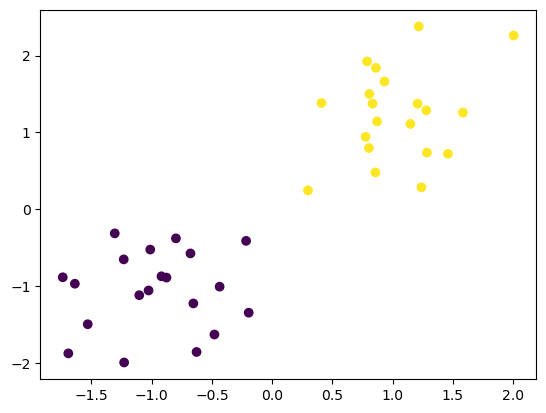

In [5]:
plt.scatter(X[:, 0],X[:, 1],c=y)

In [6]:
mbk.fit(X)

d:\CODE\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
d:\CODE\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=2)

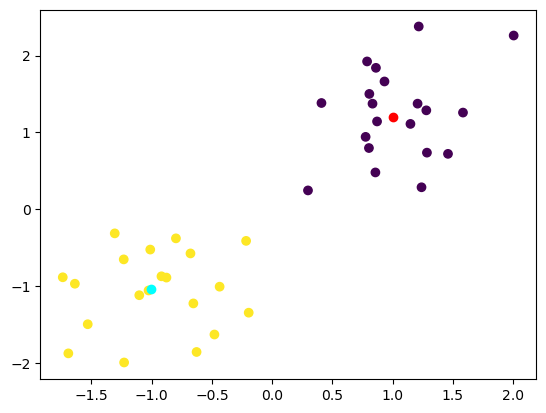

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=mbk.labels_)
plt.plot(mbk.cluster_centers_[0, 0], mbk.cluster_centers_[0, 1], 'o', c='red')
plt.plot(mbk.cluster_centers_[1, 0], mbk.cluster_centers_[1, 1], 'o', c='cyan')

In [9]:
np.random.seed(21)
X, y = arrayGenCla(num_examples = 1000000, num_inputs = 10, num_class = 5, deg_dispersion = [4, 1])

In [10]:
km = KMeans(n_clusters=5, max_iter=1000)
mbk = MiniBatchKMeans(n_clusters=5, max_iter=1000)

In [11]:
import time

In [12]:
t0 = time.time()
km.fit(X)
t_batch = time.time() - t0
t_batch

d:\CODE\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


13.734153509140015

In [13]:
t0 = time.time()
mbk.fit(X)
t_batch = time.time() - t0
t_batch

d:\CODE\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
d:\CODE\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


0.6970219612121582

In [15]:
print(km.inertia_, '-', mbk.inertia_)

49990787.90689321 - 50013561.18053605


- ### DBSCAN

In [16]:
from sklearn.datasets import make_moons

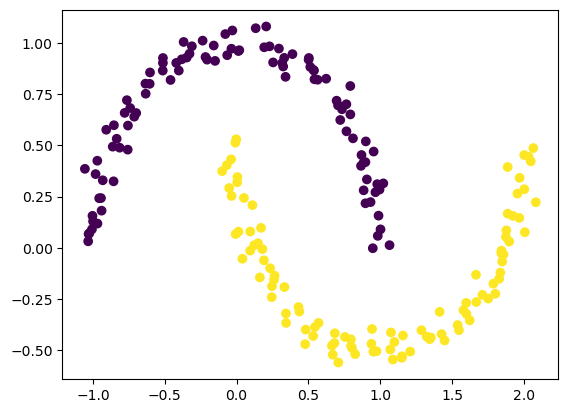

In [17]:
X, y = make_moons(200, noise=0.05, random_state=21)
plt.scatter(X[:,0], X[:,1], c = y)

In [18]:
km = KMeans(n_clusters=2)
km.fit(X)

d:\CODE\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\CODE\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

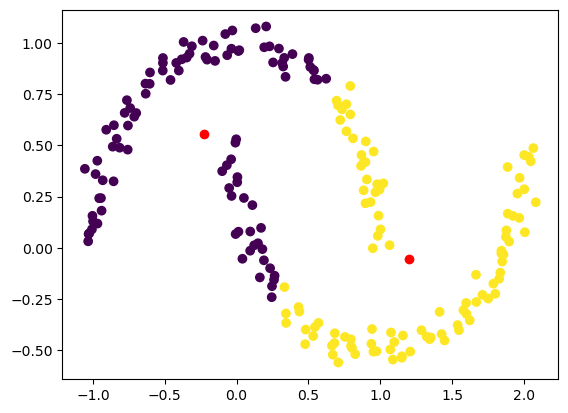

In [19]:
plt.scatter(X[:,0], X[:,1], c = km.labels_)
plt.plot(km.cluster_centers_[:,0], km.cluster_centers_[:,1], 'ro')

> Convex boundaries for K-Means clustering

当然对于给予密度的聚类算法，最重要的是给出密度的相关的定义。在DBSCAN中，我们通过两个概念和密度密切相关：分别是半径（eps）与半径范围内点的个数（num_samples）。对于数据集中任意一个点，只要给定一个eps，就能算出对应的num_samples。

当然，eps越小、num_samples越大，则说明该点所在区域密度较高。当然，我们可以据此设置一组参数，即半径（eps）和半径范围内至少包含多少点（min_samples）作为评估指标，来对数据集中不同的点进行密度层面的分类：例如我们令eps=Eps（某个数），min_samples=6，并且如果某点在一个Eps范围内包含的点的个数大于min_samples，则称该点为核心点（core point）；而如果某个点不是核心点，但是在某个核心点的一个eps领域内，则称该点为边界点；而如果某点既不是核心点也不是边界点，则成该点为噪声点。

In DBSCAN, we are closely related to density through two concepts: radius (eps) and the number of points within the radius (num_samples). For any point in the data set, as long as an eps is given, the corresponding num_samples can be calculated.
Of course, the smaller the eps and the larger the num_samples are, the higher the density of the area where the point is located. Of course, we can set a set of parameters based on this, namely the radius (eps) and the minimum number of points contained within the radius (min_samples) as evaluation indicators to classify different points in the data set at the density level: For example, we let eps=Eps (a certain number), min_samples=6, and if the number of points contained in a certain point in an Eps range is greater than min_samples, the point is called a core point (core point); and if a certain point is not a core point, but Within an EPS area of a certain core point, the point is called a boundary point.

In [20]:
from sklearn.cluster import DBSCAN

In [ ]:
DBSCAN?

In [21]:
db = DBSCAN(eps=0.3, min_samples=10)

In [22]:
db.fit(X)

DBSCAN(eps=0.3, min_samples=10)

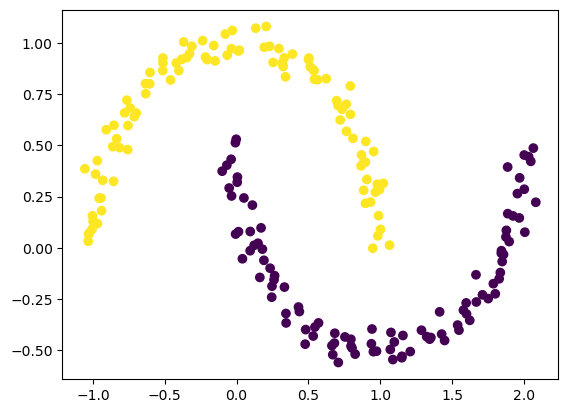

In [24]:
plt.scatter(X[:,0], X[:,1], c = db.labels_)

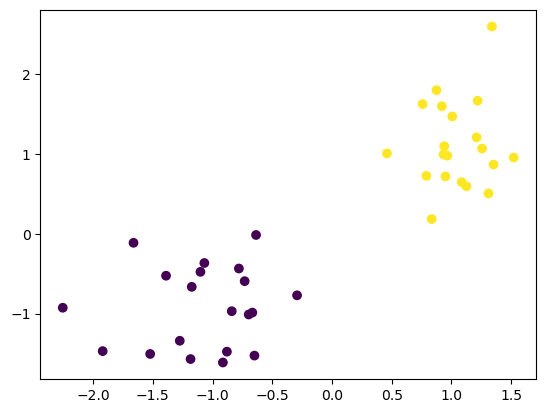

In [25]:
np.random.seed(23)
X, y = arrayGenCla(num_examples = 20, num_inputs = 2, num_class = 2, deg_dispersion = [2, 0.5])
plt.scatter(X[:, 0],X[:, 1],c=y)

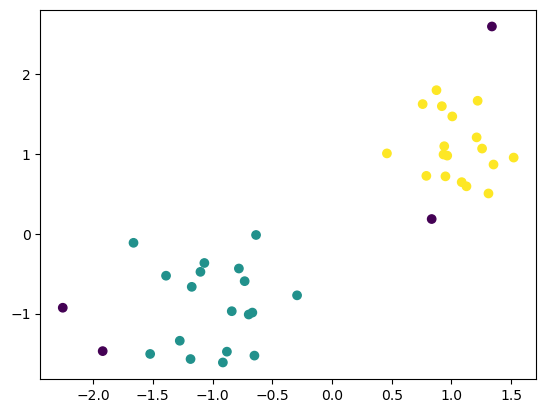

In [26]:
DB = DBSCAN(eps=0.5, min_samples=5).fit(X)
plt.scatter(X[:,0], X[:,1], c = DB.labels_)

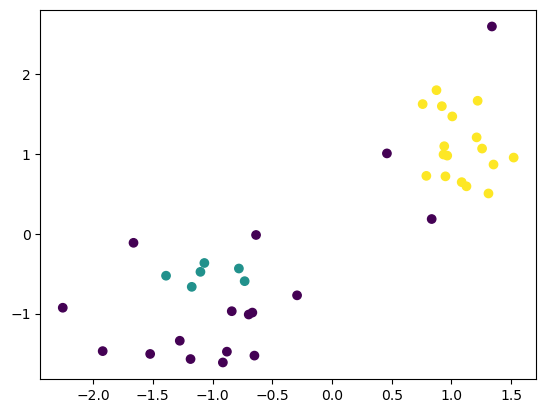

In [27]:
DB = DBSCAN(eps=0.4, min_samples=6).fit(X)
plt.scatter(X[:,0], X[:,1], c = DB.labels_)

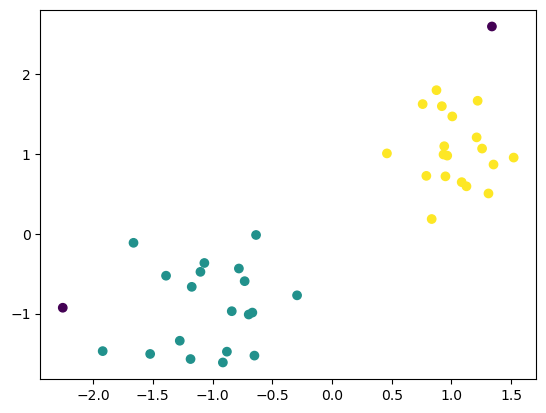

In [28]:
DB = DBSCAN(eps=0.6, min_samples=4).fit(X)
plt.scatter(X[:,0], X[:,1], c = DB.labels_)